<a href="https://colab.research.google.com/github/PrajwalUnaik/DataAnalytics_Practice/blob/main/Day6_Embedded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

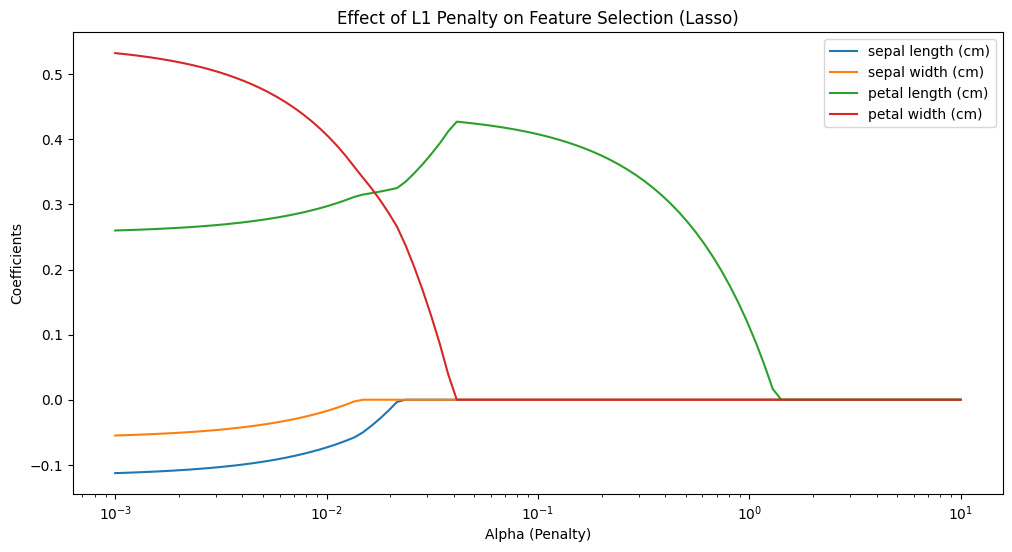

Selected Features with Lasso Regularization (Alpha = 0.1):
['petal length (cm)']


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values, generates a sequence of 100 values logarithmically spaced between 10^-3, and 10^1
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Plot the effect of penalty on Lasso coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L1 Penalty on Feature Selection (Lasso)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature selection with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
lasso = Lasso(alpha=chosen_alpha, max_iter=10000)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features with Lasso Regularization (Alpha = 0.1):")
print(selected_features.tolist())


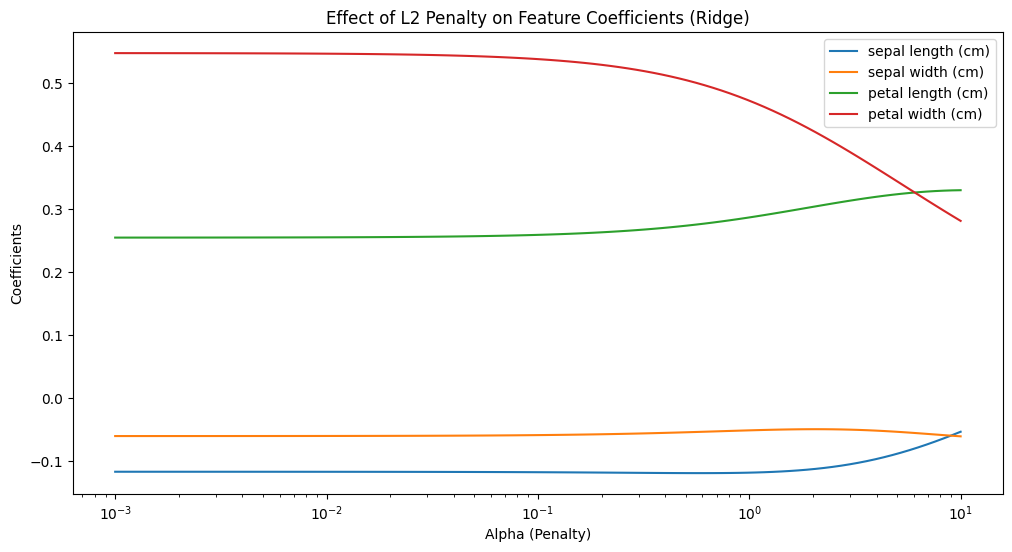

Ridge Coefficients with Regularization (Alpha = 0.1):
sepal length (cm): -0.1171
sepal width (cm): -0.0583
petal length (cm): 0.2593
petal width (cm): 0.5380


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1 # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

print(f"Ridge Coefficients with Regularization (Alpha = {chosen_alpha}):")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")


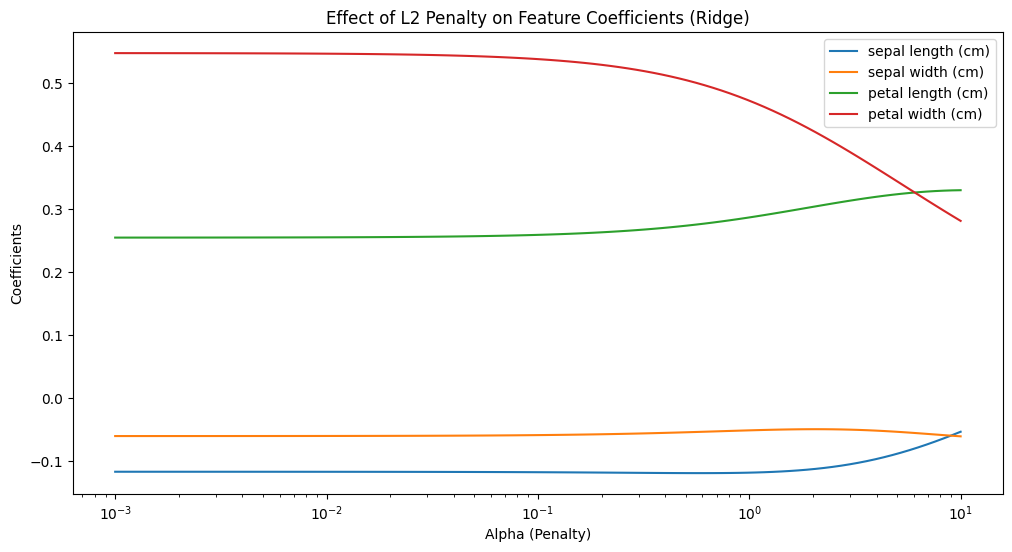

Selected Features with Ridge Regularization (Alpha = 0.1, Threshold = 0.05379879309992572):
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Feature Coefficients:
sepal length (cm): -0.1171 
sepal width (cm): -0.0583 
petal length (cm): 0.2593 
petal width (cm): 0.5380 


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regularization
alphas = np.logspace(-3, 1, 100)  # Range of penalty values
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

# Plot the effect of penalty on Ridge coefficients
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha (Penalty)')
plt.ylabel('Coefficients')
plt.title('Effect of L2 Penalty on Feature Coefficients (Ridge)')
plt.legend(X.columns, loc='best')
plt.show()

# Final feature analysis with a chosen alpha
chosen_alpha = 0.1  # Adjust alpha based on analysis
ridge = Ridge(alpha=chosen_alpha, max_iter=10000)
ridge.fit(X_train, y_train)

# Define a threshold for removing features
coefficients = ridge.coef_
threshold = 0.1 * max(abs(coefficients))  # Adjust based on domain knowledge or analysis
selected_features = X.columns[np.abs(coefficients) > threshold]

print(f"Selected Features with Ridge Regularization (Alpha = {chosen_alpha}, Threshold = {threshold}):")
print(selected_features.tolist())

print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f} {'(Removed)' if abs(coef) <= threshold else ''}")


Original Dataset (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Selected Features with Decision Tree (Threshold = 0.05):
['petal length (cm)']

Feature Importances:
sepal length (cm): 0.0085 (Removed)
sepal width (cm): 0.0000 (Removed)
petal length (cm): 0.9521 
petal width (cm): 0.0394 (Removed)


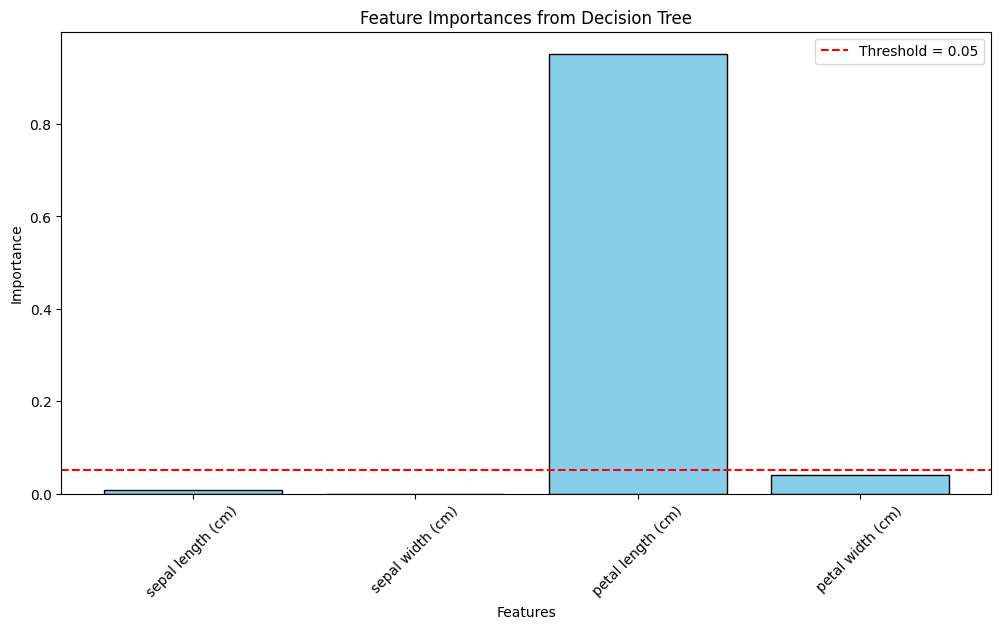

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets

# Display the original dataset
print("Original Dataset (First 5 Rows):")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Embedded Feature Selection
# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth can be adjusted
tree.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree.feature_importances_

# Define a threshold for importance
threshold = 0.05  # Adjust based on analysis
selected_features_tree = X.columns[feature_importances > threshold]

# Print Selected Features and their Importances
print(f"Selected Features with Decision Tree (Threshold = {threshold}):")
print(selected_features_tree.tolist())

print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f} {'(Removed)' if importance <= threshold else ''}")

# Plot Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances, color='skyblue', edgecolor='black')
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Original Dataset (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Selected Features with Decision Tree (Threshold = 0.05):
['petal length (cm)']

Feature Importances:
sepal length (cm): 0.0085 (Removed)
sepal width (cm): 0.0000 (Removed)
petal length (cm): 0.9521 
petal width (cm): 0.0394 (Removed)


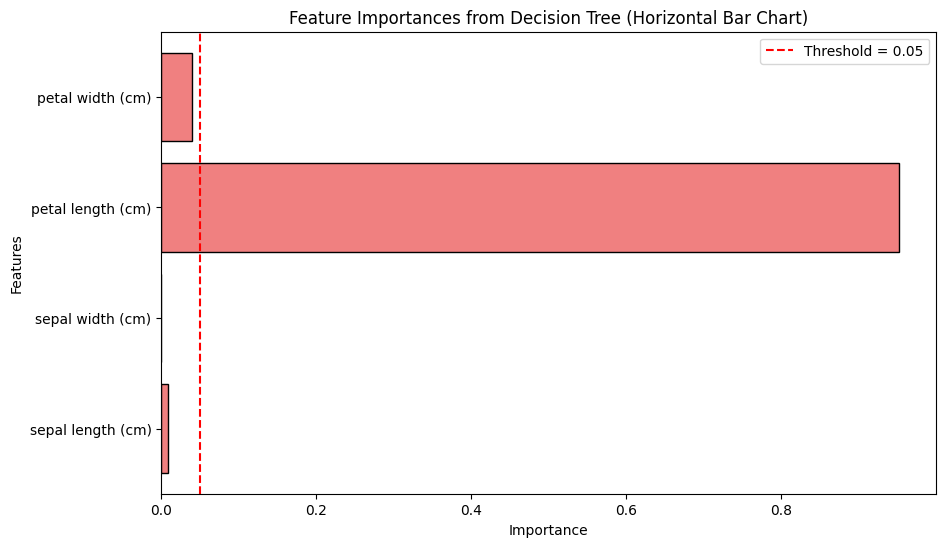

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Using class labels as numeric targets

# Display the original dataset
print("Original Dataset (First 5 Rows):")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Embedded Feature Selection
# Train a Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth can be adjusted
tree.fit(X_train, y_train)

# Extract feature importances
feature_importances = tree.feature_importances_

# Define a threshold for importance
threshold = 0.05  # Adjust based on analysis
selected_features_tree = X.columns[feature_importances > threshold]

# Print Selected Features and their Importances
print(f"Selected Features with Decision Tree (Threshold = {threshold}):")
print(selected_features_tree.tolist())

print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f} {'(Removed)' if importance <= threshold else ''}")

# Plot Feature Importances - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='lightcoral', edgecolor='black')
plt.axvline(x=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Decision Tree (Horizontal Bar Chart)')
plt.legend()
plt.show()
